Ejemplo extraido de 

http://dataconomy.com/2016/10/big-data-python/



In [86]:
import pandas as pd # Librería de gestion de Tablas y Ficheros

import matplotlib as plt

%matplotlib inline

In [49]:
salariosSF = pd.read_csv('Salaries.csv', low_memory=False) # Leemos la tabla de salarios de San Francisco

## Ahora tenemos una tabla (dataframe) llamado salariosSF con los datos

In [50]:
salariosSF.head() # Mostramos la tabla en la pantalla (primeras filas)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [72]:
columnas=list(salariosSF.columns)
for columna in columnas:
    print(columna)

Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


# Queremos saber los Tipos de Datos de las columnas

In [63]:
salariosSF.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [52]:
salaries.describe() # Estadísticas elementales para los datos de la tabla

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [80]:
latest_salaries = salariosSF[salariosSF['Year'] == 2014]

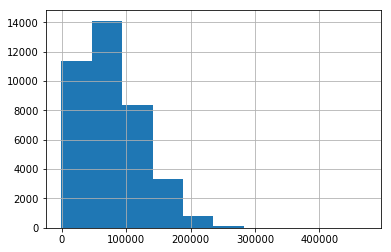

In [89]:
latest_salaries.TotalPay.hist();

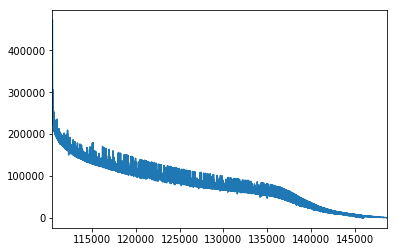

In [90]:
latest_salaries.TotalPay.plot();

In [81]:
latest_salaries.count()

Id                  38123
EmployeeName        38123
JobTitle            38123
BasePay             38123
OvertimePay         38123
OtherPay            38123
Benefits            38123
TotalPay            38123
TotalPayBenefits    38123
Year                38123
Notes                   0
Agency              38123
Status              38119
dtype: int64

In [54]:
average_yearly_rent = 3880 * 12

In [55]:
average_city_pay = latest_salaries['TotalPay'].mean()

In [64]:
print( 100 * average_yearly_rent / average_city_pay, ' %')

61.69836015336546  %


Ouch! Considering most financial advice instructs to spend no more than 30% of your salary for housing expenses, this is shocking. On that note, how many city employees make below the average one-bedroom rent per year?

In [71]:
latest_salaries[latest_salaries['TotalPay'] < average_yearly_rent].shape[0]

11360

Yikes. Using the dataframe’s shape method (which returns the number of rows and columns), we can see there are more than 11,000 employees in that group. I also noticed ‘TotalPay’ is a combination of ‘BasePay’ and ‘OvertimePay’. I wondered how many city employee’s *needed* to work overtime to afford to live. Since the ‘BasePay’ column didn’t properly import as a number, we must do some conversion first.

In [65]:
pd.to_numeric(latest_salaries['BasePay'], errors='coerce').describe()

count     38119.000000
mean      66564.421924
std       44053.783972
min           0.000000
25%       30138.055000
50%       65055.000000
75%       94735.050000
max      318835.490000
Name: BasePay, dtype: float64

In [66]:
base_pay_series = pd.to_numeric(latest_salaries['BasePay'], errors='coerce')

In [67]:
base_pay_series[base_pay_series * .7 < average_yearly_rent].shape

(20074,)

After converting, I took a rough guess if you spend 70% of your income on rent, you can’t afford to live there.

So more than 20,000 city employees can’t afford the average one-bedroom apartment in San Francisco on their own salary. Although not entirely surprising, given the news coverage in recent years, that’s still quite extreme. I wanted to see how many city employees were working more than $1K overtime annually.

In [68]:
overtime_series = pd.to_numeric(latest_salaries['OvertimePay'], errors='coerce')

In [69]:
overtime_series.describe()

count     38119.000000
mean       5401.993737
std       11769.656257
min           0.000000
25%           0.000000
50%           0.000000
75%        5113.430000
max      173547.730000
Name: OvertimePay, dtype: float64

In [70]:
overtime_series[overtime_series > 1000].shape

(15361,)

More than 15,000! You can see there’s much more to explore here. Within this dataset we haven’t explored which types of employees make more or less money, or whether employees are getting normal pay raises and promotions. We could also do more research to determine whether the average family household in San Francisco has two incomes and what those are, as well as how many bedrooms the average family in San Francisco has. We could figure out more average pay wages in San Francisco (how much do teachers make? Cab drivers? What about manual labor? Restaurant staff?). We could also map the dataset against the Priceonomics data to show what neighborhoods the average city employee can afford and how much longer their commute is due to the rent increases. We could calculate more about the cost of living using many sites tracking average cost of living, and build a salary converter to show how much you would need to make in San Francisco to support your quality of life.

Regardless of what questions you are interested in learning about, you can see that with only a little bit of Python, data analysis is simple and straightforward. With Python, you can ingest and transform data in less than 10 minutes and start exploring your questions immediately.